In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

data = pd.read_csv("mnist_784_csv.csv")
data = data.drop(columns=['class']).values
data = data / 255.0

train, test = train_test_split(data)

noise_factor = .5
train_noisy = train + noise_factor * np.random.normal(size=train.shape)
test_noisy = test + noise_factor * np.random.normal(size=test.shape)

train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)


In [7]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(784, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='mse'
)
result = model.fit(train_noisy, train, epochs=20, validation_split=.1)

Epoch 1/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0522 - val_loss: 0.0256
Epoch 2/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0243 - val_loss: 0.0217
Epoch 3/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0209 - val_loss: 0.0203
Epoch 4/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0193 - val_loss: 0.0188
Epoch 5/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0183 - val_loss: 0.0182
Epoch 6/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0175 - val_loss: 0.0176
Epoch 7/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0170 - val_loss: 0.0173
Epoch 8/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0166 - val_loss: 0.0173
Epoch 9/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0162 - val_loss: 0.0169
Epoch 10/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0159 - val_loss: 0.0166
Epoch 11/20
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0156 - val_loss: 0.0164
Epoch 12/20
1477/1477 ━━━━━━━━

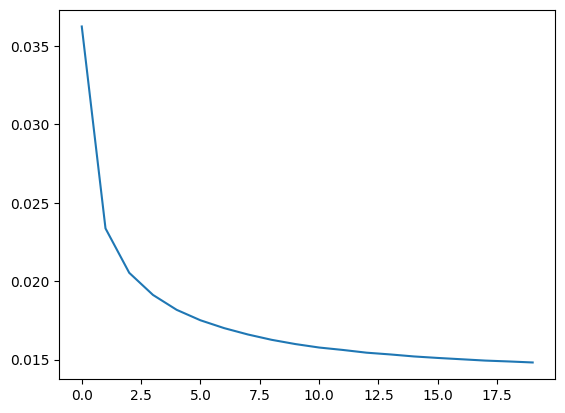

In [8]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.show()

547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


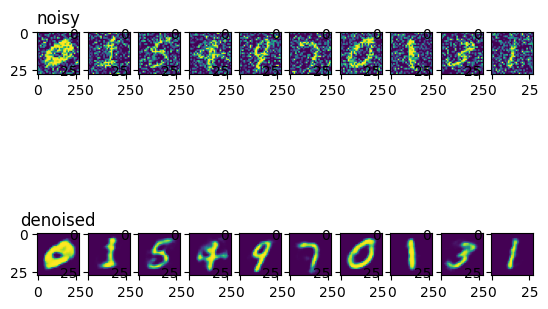

In [10]:
recon = model.predict(test_noisy)
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_noisy[i].reshape(28, 28))
    if i==0: plt.title("noisy")
    plt.subplot(2, 10, i+10+1)
    plt.imshow(recon[i].reshape(28, 28))
    if i==0: plt.title("denoised")